# Detección de Fraude
## Elaborador por: Diego Armando Vallejo Vinueza


# Comprensión del Negocio

El objetivo del proyecto es desarrollar un modelo de predicción de fraude para una institución financiera como un banco.
El fraude representa una pérdida significativa de ingresos para los bancos y es importante detectarlo de manera oportuna.
El modelo se construirá usando datos históricos de transacciones y se aplicará a nuevas transacciones para identificar posibles fraudes.

# Comprensión de los Datos

Los datos que se utilizarán provienen de Kaggle y contienen información de transacciones bancarias, incluyendo características como el tipo de transacción, el monto, la ubicación geográfica, entre otras. Además, cada transacción está etiquetada como fraude o no fraude.

Los datos pueden ser revisados desde del enlace: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Es importante tomar en cuenta que los datos provienen del repositorio de kaggle, los cuáles representan a variables como resultado de la reducción de Análisis de Componenentes principales, lo cuál nos limita a entender cuál es la naturaleza de las mismas.

Lo que consideramos es buscar las variables con mayor importancia en la predicción de fraude de manera que pueda servir de retroalimentación para el propietario de los datos y de esa manera pueda analizar las variables con mayor importancia de decisión.

# Preparación de los Datos

In [ ]:

# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde el archivo local
data = pd.read_csv("creditcard.csv")

# Dividir los datos en características y etiquetas
X = data.drop('Class', axis=1)
y = data['Class']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelado y Evaluación de 4 Modelos (Incluye Red Neuronal)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
}

for name, model in models.items():
    print(f"Entrenando modelo: {name}")
    model.fit(X_train_scaled, y_train)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular métricas de evaluación
    print(f"\n{classification_report(y_test, y_pred)}")
    print(f"Area Under ROC ({name}): {roc_auc_score(y_test, y_pred_proba)}")
    
    # Generar la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Visualizar la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.show()




# Despliegue

Para desplegar el modelo en producción, se puede guardar utilizando la biblioteca pickle o joblib.
Luego, se puede cargar en una aplicación web o servicio para realizar predicciones en tiempo real.


# Análisis de Resultados

- Para determinar las variables del conjunto de datos que tienen mayor relevancia en la predicción de fraude utilizando el modelo de Regresión Logística, se puede examinar los coeficientes de las características en el modelo entrenado. 

- Los coeficientes más grandes (en valor absoluto) indicarán las características que tienen mayor influencia en la predicción de fraude.

- Se presenta un código para visualizar los coeficientes de las características del modelo de Regresión Logística y su importancia relativa:

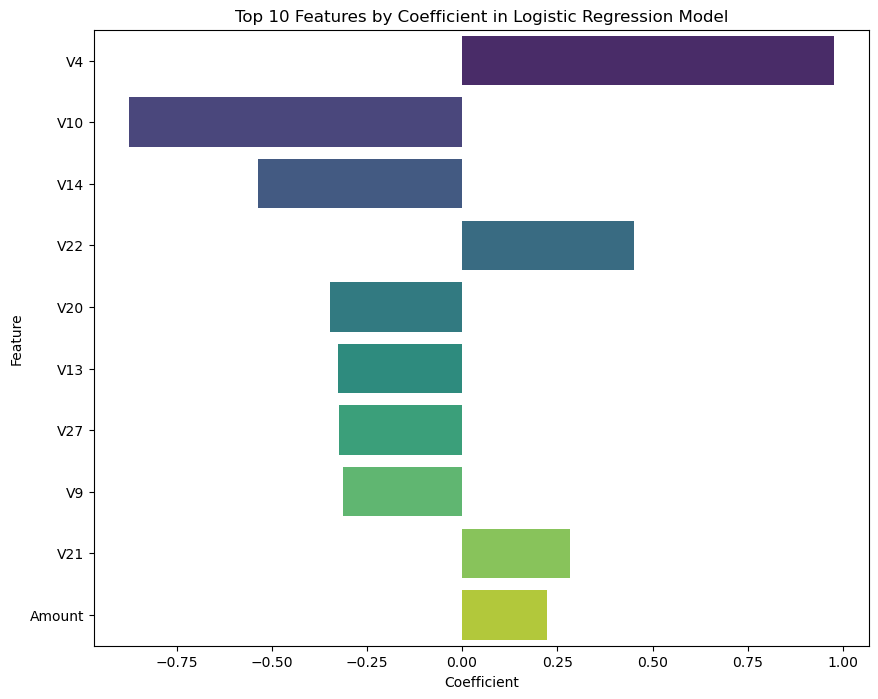

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Cargar los datos desde el archivo local
data = pd.read_csv("creditcard.csv")

# Dividir los datos en características y etiquetas
X = data.drop('Class', axis=1)
y = data['Class']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_scaled, y)

# Obtener los coeficientes del modelo
coeficients = model.coef_[0]

# Crear un DataFrame para visualizar los coeficientes y las características correspondientes
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coeficients})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])

# Ordenar el DataFrame por el valor absoluto de los coeficientes
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Visualizar los coeficientes de las características más importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='viridis')
plt.title('Top 10 Features by Coefficient in Logistic Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


# Conclusiones

#### Los coeficientes representan la influencia relativa de cada característica en la predicción del fraude, donde un valor positivo indica que la característica aumenta la probabilidad de fraude, y un valor negativo indica que la característica disminuye la probabilidad de fraude.

#### Las características con los coeficientes más grandes son:
- V4: Este es el coeficiente más grande y positivo, lo que sugiere que esta característica (desconocida) tiene una fuerte influencia en aumentar la probabilidad de fraude.
- V10: El segundo coeficiente más grande, es negativo, lo que indica que esta característica no contribuye significativamente a incrementar la probabilidad de fraude.
- V14: Esta característica también tiene un coeficiente negativo grande, sugiriendo que no aumenta la probabilidad de fraude.
- V22: Tiene un valor positivo menor a v4, lo que significa que su presencia puede aumentar la probabilidad de fraude.
- V20, V13, V27, V9: Estas características tienen coeficientes moderadamente negativos, lo que significa que su presencia no tiende a aumentar, la probabilidad de fraude.
- V21 y Amount: Estas características tienen coeficientes positivos pero no son significativamente grandes, lo que implica que su presencia puede influir en la probabilidad de fraude aunque no en gran medida.